In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
import glob
import os
%matplotlib inline

In [2]:
#pip install ipympl

In [3]:
samples = ['IN','PB2','SNPB','IN2BI','IN4BI', 'SN'] #superconducting
controls = ["PTFE", "Cu"] #non-superconducting

10
IN
PB2
SNPB
Cu
PTFE
IN2BI
IN4BI
SN
PB0
PB1


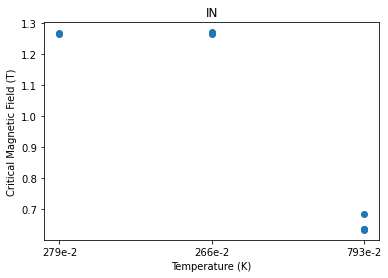

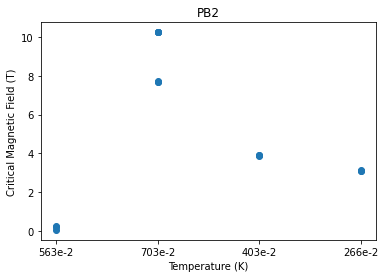

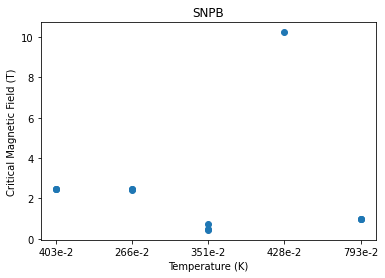

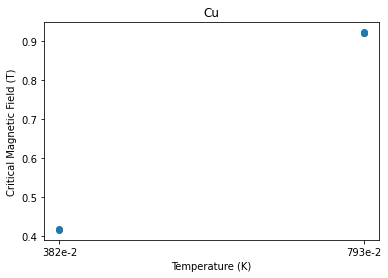

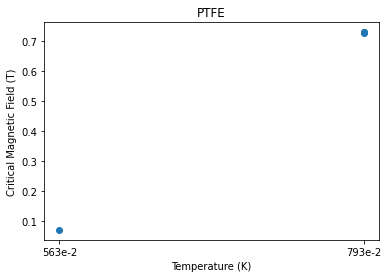

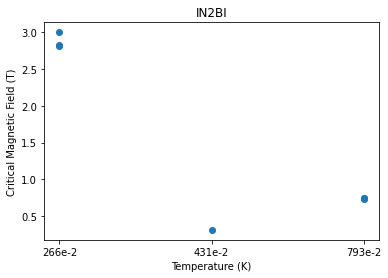

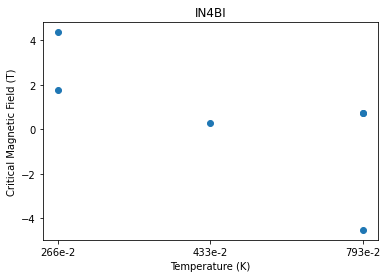

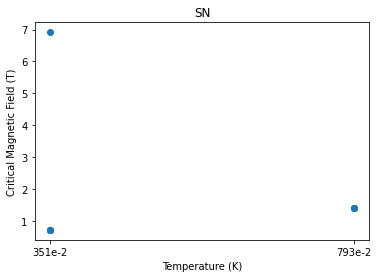

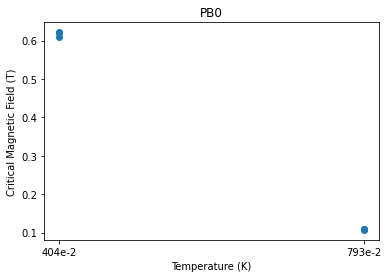

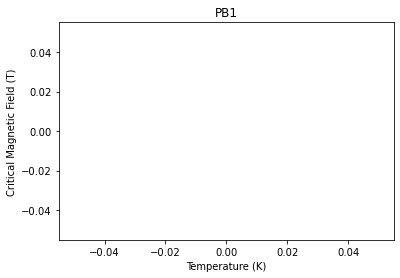

In [36]:
#determinr HC at zero temperature and Tc by doing a fit 
files = glob.glob('Meissner/*.txt')
files.sort()

PB0 = [[], []]
PB1 = [[], []]

IN = [[], []]
PB2 = [[], []]
SNPB = [[], []]
Cu = [[], []]
PTFE = [[], []]
IN2BI = [[], []]
IN4BI = [[], []]
SN = [[], []]

all_samples = {"IN": IN, "PB2": PB2, "SNPB": SNPB, "Cu": Cu, "PTFE": PTFE, "IN2BI": IN2BI, "IN4BI": IN4BI, "SN": SN, "PB0": PB0, "PB1":PB1}

def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

for file in files:
    df = pd.read_table(file,names = ['v0','v1','v2','v3'])
    #plt.figure()
    #plt.plot(df['v0'],df['v1'],label=file)
    #plt.xlabel("Voltage (V)")
    #plt.ylabel("Magnetic Field (T)")
    #plt.xlim(left= 0)
    #plt.title(file)
    
    sample_critical_B = df["v1"].max()
    
    
    index1_temp = find_nth(file, "_", 2) + 1
    index2_temp = find_nth(file, "K", 1)
    
    
    index1_name = find_nth(file, "_", 1) +1 
    index2_name = find_nth(file, "_", 2)
    
    sample_temperature = file[index1_temp:index2_temp]
    sample_name = file[index1_name: index2_name]
    
    all_samples[sample_name][0].append(sample_temperature)
    all_samples[sample_name][1].append(sample_critical_B)

    
    #plt.legend()
#plt.close("all")

print(len(all_samples))
for sample in all_samples: #add some error bars 
    print(sample)
    plt.figure()
    plt.plot(all_samples[sample][0], all_samples[sample][1], "o") 
    plt.xlabel("Temperature (K)")
    plt.ylabel("Critical Magnetic Field (T)")
    plt.title(sample)

In [ ]:
plt.figure()
df = pd.read_table(file,names = ['v0','v1','v2','v3'])
plt.plot(df['v0'],df['v1'],label=file)

In [ ]:
files

In [ ]:
plt.figure()
files = glob.glob('Meissner/6Vpp*PB2*')
for file in files:
    df = pd.read_table(file,names = ['v0','v1','v2','v3'])
    plt.plot(df['v0'],df['v1'])